## Test Distribution Visualization

In [1]:
from RTER import RegressionTree
from distribution import TestDistribution
import numpy as np


from sklearn.metrics import mean_squared_error as MSE
import matplotlib.pyplot as plt

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from time import time

from comparison.ensemble import RegressionTreeBoosting, RegressionTreeEnsemble
from comparison.EKNN import EKNN

0.08027985527365845

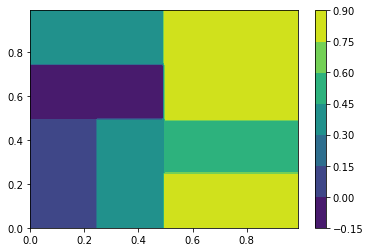

In [3]:
generator=TestDistribution(6).returnDistribution()
np.random.seed(3)
X_train,Y_train=generator.generate(1000)
axis0,axis1 = np.meshgrid(np.arange(0,1,0.01),np.arange(0,1,0.01))
X_grid = np.array([axis0.ravel(),axis1.ravel()]).T
model = RegressionTree(estimator="extrapolation_estimator",
                         splitter="maxedge",
                         min_samples_split=30,
                         max_depth=3,
                         order=1,
                         random_state=4,
                         truncate_ratio_low= 0.1,
                         truncate_ratio_up= 0.98)
model.fit(X_train, Y_train)
predict_result=model.predict(X_grid).reshape(-1,100)
np.mean((model.predict(X_grid)-np.mean(X_grid,axis=1))**2)
plt.contourf(axis0, axis1,predict_result) #,vmin=0,vmax=20)
plt.colorbar()

In [4]:
from sklearn.ensemble import GradientBoostingRegressor


model_GBRT = GradientBoostingRegressor(n_estimators = 2)

model_GBRT.fit(X_train, Y_train.ravel())
y_hat=model_GBRT.predict(X_grid)
mse_score = MSE(y_hat, np.mean(X_grid,axis=1))
mse_score

GradientBoostingRegressor(n_estimators=2)

0.02700280573473826

In [1]:
from RTER import RegressionTree
from distribution import TestDistribution
import numpy as np


from sklearn.metrics import mean_squared_error as MSE
import matplotlib.pyplot as plt

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from time import time


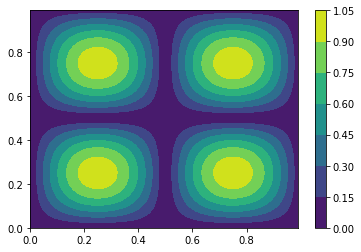

In [2]:
generator=TestDistribution(8).returnDistribution()
np.random.seed(3)

axis0,axis1 = np.meshgrid(np.arange(0,1,0.01),np.arange(0,1,0.01))
X_grid = np.array([axis0.ravel(),axis1.ravel()]).T

predict_result=generator.evaluate(X_grid).reshape(-1,100)
plt.contourf(axis0, axis1,predict_result) #,vmin=0,vmax=20)
plt.colorbar()

In [53]:
generator=TestDistribution(7).returnDistribution()
np.random.seed(4)
X_train,Y_train=generator.generate(3000)
X_test,Y_test = generator.generate(5000)
axis0,axis1 = np.meshgrid(np.arange(0,1,0.01),np.arange(0,1,0.01))
X_grid = np.array([axis0.ravel(),axis1.ravel()]).T
model = RegressionTree(estimator="pointwise_extrapolation_estimator",
                         splitter="maxedge",
                         min_samples_split=10,
                         max_depth=4,
                         order=3,
                         random_state=4,
                         truncate_ratio_low=0,
                         truncate_ratio_up= 1,
                      r_range_low=0.1,
                      r_range_up=0.5,
                      step=4,
                      lamda=0.05)
model.fit(X_train, Y_train)
predict_result=model.predict(X_grid).reshape(-1,100)
plt.contourf(axis0, axis1,predict_result) #,vmin=0,vmax=20)
plt.colorbar()
MSE(model.predict(X_grid),generator.evaluate(X_grid))
MSE(model.predict(X_test),Y_test)


IndexError: index 2 is out of bounds for axis 1 with size 2

In [4]:
from sklearn.ensemble import GradientBoostingRegressor


model_GBRT = GradientBoostingRegressor(n_estimators = 150)

_=model_GBRT.fit(X_train, Y_train)
y_hat=model_GBRT.predict(X_test)
mse_score = MSE(y_hat, Y_test)
mse_score

0.10963126846177852

In [5]:
node_idx=0
ERT_model=model
query_obj=list(ERT_model.tree_.leafnode_fun.values())[node_idx]
X_range,dt_X, dt_Y = query_obj.X_range, query_obj.dt_X, query_obj.dt_Y
X_range
X_extra= X_range.mean(axis=0)+0.05
order, truncate_ratio_low, truncate_ratio_up , r_range_low, r_range_up, step= 1,0,1,0,0.7,2

sorted_ratio, sorted_prediction, intercept = ERT_model.get_node_extrapolation(dt_X, dt_Y, X_extra, X_range, order, truncate_ratio_low, truncate_ratio_up,r_range_low, r_range_up,step)
_=plt.scatter((sorted_ratio),sorted_prediction)
_=plt.scatter((sorted_ratio)[int(len(sorted_ratio)*truncate_ratio_low):int(len(sorted_ratio)*truncate_ratio_up)],sorted_prediction[int(len(sorted_prediction)*truncate_ratio_low):int(len(sorted_prediction)*truncate_ratio_up)])
_=plt.axhline(intercept,color="red")
_=plt.axhline(generator.evaluate(X_extra.reshape(1,-1)),color="blue")

array([[0.  , 0.  ],
       [0.25, 0.25]])

TypeError: get_node_extrapolation() missing 1 required positional argument: 'lamda'

## Ensemble 

In [1]:
from RTER import RegressionTree
from distribution import TestDistribution
import numpy as np


from sklearn.metrics import mean_squared_error as MSE
import matplotlib.pyplot as plt

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from time import time

from comparison.ensemble import RegressionTreeBoosting, RegressionTreeEnsemble
from comparison.EKNN import EKNN

In [2]:
generator=TestDistribution(7).returnDistribution()
np.random.seed(1)
X_train,Y_train=generator.generate(2000)
X_test,Y_test = generator.generate(1000)
model_boosting = RegressionTreeBoosting(rho=0.1,
                      boost_num= 100,
                      estimator="naive_estimator",
                         splitter="maxedge",
                         min_samples_split=10,
                         max_depth=4,)

_=model_boosting.fit(X_train, Y_train)
y_hat=model_boosting.predict(X_test)
mse_score = MSE(y_hat, Y_test)
mse_score

0.19528987180570548

In [3]:
generator=TestDistribution(7).returnDistribution()
np.random.seed(1)
X_train,Y_train=generator.generate(2000)
X_test,Y_test = generator.generate(1000)
model_EKNN = EKNN(V=5,C=10)

_=model_EKNN.fit(X_train, Y_train)
y_hat=model_EKNN.predict(X_test)
mse_score = MSE(y_hat, Y_test)
mse_score

0.22979486890973255

In [1]:
from RTER import RegressionTree
from distribution import TestDistribution
import numpy as np


from sklearn.metrics import mean_squared_error as MSE
import matplotlib.pyplot as plt

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from time import time

from comparison.ensemble import RegressionTreeBoosting, RegressionTreeEnsemble
from comparison.EKNN import EKNN
from sklearn.model_selection import GridSearchCV


In [25]:
order, truncate_ratio_low, truncate_ratio_up , r_range_low, r_range_up ,step, lamda = 1,0,0.6,0,1,2, 0.001

generator=TestDistribution(3).returnDistribution()
np.random.seed(3)
X_train,Y_train=generator.generate(3000)
X_test,Y_test = generator.generate(1000)

model = RegressionTree(estimator="naive_estimator",
                         splitter="maxedge",
                         min_samples_split=5,
                         max_depth=5,
                         order=order,
                         random_state=1,
                         truncate_ratio_low=truncate_ratio_low,
                         truncate_ratio_up= truncate_ratio_up,
                      r_range_low=r_range_low,
                      r_range_up=r_range_up,
                      step=step,
                      lamda = lamda)
model.fit(X_train, Y_train)
MSE(model.predict(X_test),Y_test)

model = RegressionTree(estimator="pointwise_extrapolation_estimator",
                         splitter="maxedge",
                         min_samples_split=5,
                         max_depth=1,
                         order=order,
                         random_state=1,
                         truncate_ratio_low=truncate_ratio_low,
                         truncate_ratio_up= truncate_ratio_up,
                      r_range_low=r_range_low,
                      r_range_up=r_range_up,
                      step=step,
                      lamda = lamda)
model.fit(X_train, Y_train)
MSE(model.predict(X_test),Y_test)



'''
model_ensemble = RegressionTreeEnsemble(splitter="maxedge",
                         min_samples_split=10,
                         max_depth=7,
                        ensemble_num=200)
model_ensemble.fit(X_train, Y_train)
MSE(model_ensemble.predict(X_test),Y_test)
'''

30476.697196049055

1543.825143096035

'\nmodel_ensemble = RegressionTreeEnsemble(splitter="maxedge",\n                         min_samples_split=10,\n                         max_depth=7,\n                        ensemble_num=200)\nmodel_ensemble.fit(X_train, Y_train)\nMSE(model_ensemble.predict(X_test),Y_test)\n'

In [9]:
np.array([]).mean()

/tmp/ipykernel_39673/1464929575.py:1: RuntimeWarning: Mean of empty slice.
  np.array([]).mean()
/usr/local/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


nan

In [20]:
np.abs(model.predict(X_test)-Y_test)

array([6.45950572e+01, 4.47259179e+01, 9.81184354e+00, 1.26535659e+01,
       1.08503474e+01, 5.90382511e+00, 4.49600035e+00, 1.59641175e+00,
       3.06989742e+01, 7.76826340e+01, 1.59709601e+01, 4.02292685e+01,
       8.93526802e+00, 3.95149719e+01, 3.25546491e+01, 9.72006427e+00,
       3.68863024e+00, 8.70964285e+01, 9.10219807e+00, 1.95087083e+01,
       9.00969155e+01, 6.94767627e+00, 1.69384367e+01, 1.66577013e+01,
       1.97294561e+01, 6.03717264e+01, 2.69068314e+01, 5.02228429e+01,
       1.49743672e+01, 2.26883417e+01, 9.79231874e+00, 2.41220865e+01,
       2.80134393e+01, 7.22475021e+01, 2.53032677e+01, 9.49489412e+00,
       1.79008104e+00, 1.46761860e+01, 9.55017759e+01, 3.38860134e+01,
       4.49745407e+01, 3.05501544e+00, 6.35086186e+01, 6.35425913e+01,
       2.60602543e+01, 2.95412478e+01, 3.89751068e+01, 1.79730450e+01,
       4.44561865e+01, 3.11015388e+00, 7.17116775e+00, 4.05521200e+01,
       2.28944247e+01, 1.54133385e+01, 3.34132112e+01, 1.93511824e+01,
      

array([[0.  , 0.25, 0.  , 0.25],
       [0.25, 0.5 , 0.5 , 0.5 ]])

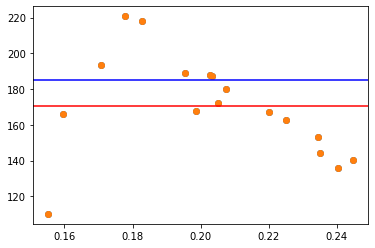

In [15]:
node_idx=5

query_obj=list(model.tree_.leafnode_fun.values())[node_idx]
X_range,dt_X, dt_Y = query_obj.X_range, query_obj.dt_X, query_obj.dt_Y
X_range
X_extra= X_range.mean(axis=0)
order, truncate_ratio_low, truncate_ratio_up , r_range_low, r_range_up= order, truncate_ratio_low, truncate_ratio_up , r_range_low, r_range_up

sorted_ratio, sorted_prediction, intercept , weight_mat = model.get_node_extrapolation(dt_X, dt_Y, X_extra, X_range, order, truncate_ratio_low, truncate_ratio_up,r_range_low, r_range_up,step,lamda=lamda)
_=plt.scatter((sorted_ratio),sorted_prediction)
_=plt.scatter((sorted_ratio)[int(len(sorted_ratio)*truncate_ratio_low):int(len(sorted_ratio)*truncate_ratio_up):step],sorted_prediction[int(len(sorted_prediction)*truncate_ratio_low):int(len(sorted_prediction)*truncate_ratio_up):step])
_=plt.axhline(intercept,color="red")
_=plt.axhline(generator.evaluate(X_extra.reshape(1,-1)),color="blue")

In [16]:
x_vec = [0.01*i for i in range(100)]
y_vec = [generator.evaluate((np.ones(4)*x).reshape(1,-1)) for x in x_vec]

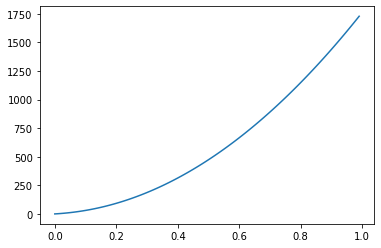

In [17]:
plt.plot(x_vec,y_vec)

In [57]:



sample_generator=TestDistribution(7).returnDistribution()
n_test, n_train = 2000,3000
X_train, Y_train = sample_generator.generate(n_train)
X_test, Y_test = sample_generator.generate(n_test)



# RTER with cv
time_start=time()
parameters={"truncate_ratio_low":[0.1], "truncate_ratio_up":[0.2],
           "min_samples_split":[30], "max_depth":[5],
           "order":[1],"splitter":["maxedge"],
           "r_range_low":[0],"r_range_up":[1]}
cv_model_RTER=GridSearchCV(estimator=RegressionTree(),param_grid=parameters, cv=10, n_jobs=-1)
cv_model_RTER.fit(X_train, Y_train)

RTER_model = cv_model_RTER.best_estimator_
mse_score= - RTER_model.score(X_test, Y_test)
y_hat_RTER = RTER_model.predict(X_test)

time_end=time()

print("RTER: mse {} time {}".format(mse_score,time_end-time_start))


GridSearchCV(cv=10,
             estimator=<RTER.tree.RegressionTree object at 0x7f7ca4c864c0>,
             n_jobs=-1,
             param_grid={'max_depth': [5], 'min_samples_split': [30],
                         'order': [1], 'r_range_low': [0], 'r_range_up': [1],
                         'splitter': ['maxedge'], 'truncate_ratio_low': [0.1],
                         'truncate_ratio_up': [0.2]})

RTER: mse 0.18141527795779286 time 7.215320825576782


In [58]:
cv_model_RTER.best_params_

{'max_depth': 5,
 'min_samples_split': 30,
 'order': 1,
 'r_range_low': 0,
 'r_range_up': 1,
 'splitter': 'maxedge',
 'truncate_ratio_low': 0.1,
 'truncate_ratio_up': 0.2}

In [59]:
node_idx=3
order, truncate_ratio_low, truncate_ratio_up , r_range_low, r_range_up = 1,0.05,0.25,0,1
query_obj=list(RTER_model.tree_.leafnode_fun.values())[node_idx]
X_range,dt_X, dt_Y = query_obj.X_range, query_obj.dt_X, query_obj.dt_Y
X_range
X_extra= X_range.mean(axis=0)+0.12
order, truncate_ratio_low, truncate_ratio_up , r_range_low, r_range_up= order, truncate_ratio_low, truncate_ratio_up , r_range_low, r_range_up

sorted_ratio, sorted_prediction, intercept = ERT_model.get_node_extrapolation(dt_X, dt_Y, X_extra, X_range, order, truncate_ratio_low, truncate_ratio_up,r_range_low, r_range_up)
_=plt.scatter((sorted_ratio),sorted_prediction)
_=plt.scatter((sorted_ratio)[int(len(sorted_ratio)*truncate_ratio_low):int(len(sorted_ratio)*truncate_ratio_up)],sorted_prediction[int(len(sorted_prediction)*truncate_ratio_low):int(len(sorted_prediction)*truncate_ratio_up)])
_=plt.axhline(intercept,color="red")
_=plt.axhline(generator.evaluate(X_extra.reshape(1,-1)),color="blue")

array([[0. , 0.5, 0. , 0.5, 0. ],
       [0.5, 1. , 0.5, 1. , 0.5]])

TypeError: get_node_extrapolation() missing 2 required positional arguments: 'step' and 'lamda'

In [92]:

from sklearn.linear_model import LinearRegression

idx = [int(7*i+3) for i in range(5) ]
x_vec = sorted_ratio[idx].reshape(-1,1)
y_vec = sorted_prediction[idx]

linear_model = LinearRegression()
linear_model.fit(x_vec,y_vec)
linear_model.intercept_

LinearRegression()

array([0.19607196])

NameError: name 'idx' is not defined

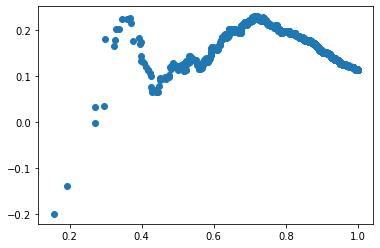

In [60]:
_=plt.scatter((sorted_ratio),sorted_prediction)
_=plt.scatter(sorted_ratio[idx], sorted_prediction[idx])
_=plt.axhline(intercept,color="red")
_=plt.axhline(generator.evaluate(X_extra.reshape(1,-1)),color="blue")
_=plt.axhline(linear_model.intercept_,color="yellow")

In [52]:
def f_7(x):
    return np.abs(np.sin(np.pi*2*x[0]))*np.abs(np.sin(np.pi*2*x[1]))*np.abs(np.sin(np.pi*2*x[2]))*np.abs(np.sin(np.pi*2*x[3]))*np.abs(np.sin(np.pi*2*x[4]))

In [53]:
f_7(X_extra)

0.07016062134056032

In [7]:
a= [i for i in range(10)]

In [8]:
a[2:9:1]

[2, 3, 4, 5, 6, 7, 8]

In [16]:
a=np.eye(10)
a[0]=0
a

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])